In [1]:
import imageio
import matplotlib.pyplot as plt
import scipy.ndimage
import numpy as np

In [2]:
def convert(front, back):
    result = front * 255 / (255 - back)
    result[result > 255] = 255
    result[back == 255] = 255
    return result.astype('uint8')

In [3]:
def grayscale(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

In [10]:
img = "https://pbs.twimg.com/profile_images/1454744415122051077/nyVJSmlT_400x400.jpg"
s = imageio.imread(img)
g = grayscale(s)
i = 255 - g
b = scipy.ndimage.filters.gaussian_filter(i, sigma=25)
r = convert(b, g)

C:\Users\Pavilion\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


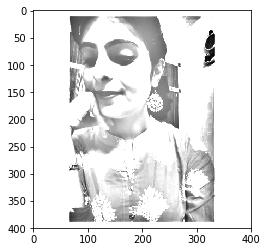

In [11]:
# Saving the B&W picture
plt.imshow(r, cmap="gray")
plt.imsave('img2.png', r, cmap='gray', vmin=0, vmax=255)